# Question 1: Load in all stock tickers as variables with the ticker symbol as their variable name

Strategy:

a) The plan is to combine all the individual stock data ".csv files" into one big csv file called Allstocks.csv

b) Then load the Allstocks.csv file into a data dictionary with the tickers as keys holding the individual stock data as pandas dataframes

In [2]:
#Import the required libraries and choose the appropriate file location
import pandas as pd
import numpy as np
import os
os.chdir('C:/Users/oduwo/Box Sync/MBUAN_Courses/FALL_18/ProgrammingForDataScience/ClassNotes/Midterm1')

In [5]:
# Combining all the csv files into 1 csv file called Allstocks.csv
path = os.getcwd()
files_in_dir = [f for f in os.listdir(path) if f.endswith('csv')]

for filenames in files_in_dir:
    df = pd.read_csv(filenames,low_memory=False)
    df.to_csv('AllStocks.csv', mode='a')

In [3]:
# Create a dataframe df_Allstocks to hold the newly combined dataset as a pandas dataframe and check column names 
df_Allstocks = pd.read_csv('AllStocks.csv')
df_Allstocks.columns

Index(['Unnamed: 0', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Name'], dtype='object')

In [4]:
df_Allstocks.head()

,Unnamed: 0,Date,Open,High,Low,Close,Volume,Name
0,0.0,2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
1,1.0,2006-01-04,41.22,41.9,40.77,40.97,20553479,AABA
2,2.0,2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
3,3.0,2006-01-06,42.88,43.57,42.8,43.21,29422828,AABA
4,4.0,2006-01-09,43.1,43.66,42.82,43.42,16268338,AABA


In [5]:
df_Allstocks.Name.unique()

array(['AABA', 'Name', 'AAPL', 'AMZN', 'AXP', 'BA', 'CAT', 'CSCO', 'CVX',
       'DIS', 'GE', 'GOOGL', 'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM',
       'KO', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PFE', 'PG', 'TRV',
       'UNH', 'UTX', 'VZ', 'WMT', 'XOM'], dtype=object)

In [4]:
#To remove the repeating headers as seen with the 'Name' element in the "Name" column in the dataset and convert object datatype to float for easy plotting
mydf = df_Allstocks.ix[~df_Allstocks.isin(['Open']).any(1)]
mydf.drop('Unnamed: 0',axis=1,inplace=True)
mydf['Open'] = mydf['Open'].astype(float)
mydf['High'] = mydf['High'].astype(float)
mydf['Low'] = mydf['Low'].astype(float)
mydf['Close'] = mydf['Close'].astype(float)
mydf['Volume'] = mydf['Volume'].astype(float)
mydf['Date'] = pd.to_datetime(mydf['Date'])
firms=mydf.Name.unique() # to get the tickers names 
firms = list(firms)

C:\Users\oduwo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
C:\Users\oduwo\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\oduwo\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\oduwo\Anaconda

In [7]:
mydf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93612 entries, 0 to 93641
Data columns (total 7 columns):
Date      93612 non-null datetime64[ns]
Open      93587 non-null float64
High      93602 non-null float64
Low       93592 non-null float64
Close     93612 non-null float64
Volume    93612 non-null float64
Name      93612 non-null object
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 5.7+ MB


In [8]:
firms

['AABA',
 'AAPL',
 'AMZN',
 'AXP',
 'BA',
 'CAT',
 'CSCO',
 'CVX',
 'DIS',
 'GE',
 'GOOGL',
 'GS',
 'HD',
 'IBM',
 'INTC',
 'JNJ',
 'JPM',
 'KO',
 'MCD',
 'MMM',
 'MRK',
 'MSFT',
 'NKE',
 'PFE',
 'PG',
 'TRV',
 'UNH',
 'UTX',
 'VZ',
 'WMT',
 'XOM']

In [5]:
# Creating the dictionary that will hold the individual dataframes with the stock tickers as keys
stock_tickers = {}
for name in firms:
    stock_tickers[name] = pd.DataFrame()
    stock_tickers[name]= mydf[mydf['Name']==name]

In [12]:
#An example to show that the data dictionary was successfully loaded
stock_tickers['AAPL'].head()

,Date,Open,High,Low,Close,Volume,Name
3020,2006-01-03,10.34,10.68,10.32,10.68,201853036.0,AAPL
3021,2006-01-04,10.73,10.85,10.64,10.71,155225609.0,AAPL
3022,2006-01-05,10.69,10.70,10.54,10.63,112396081.0,AAPL
3023,2006-01-06,10.75,10.96,10.65,10.90,176139334.0,AAPL
3024,2006-01-09,10.96,11.03,10.82,10.86,168861224.0,AAPL


# Question 2: Perform Exploratory data analysis and data visualization for different time periods using given stock dataset.

Strategy:
1. I am looking at the relationship between the trends in the high and low prices, and also trends in the opening and closing prices to see how different or similar in trends they have been over the years. 
    Apple with the stock ticker AAPL is being used for this particular analysis

2. I will also be calculating and plotting the instantaneous rate of returns based on the closing prices

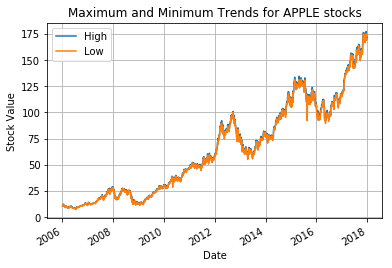

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
#plt.rcParams['figure.figsize'] = 10, 4; 
import seaborn as sns
stock_tickers['AAPL'][['Date','High','Low']].set_index('Date').plot()
plt.ylabel('Stock Value')
#plt.xlabel('Year')
plt.title("Maximum and Minimum Trends for APPLE stocks")
plt.grid(True)
plt.show()

We can see that the above trend chart shows that the maximum and minimum trend for the stock follow a similar trend and pattern

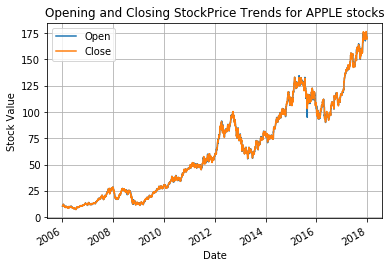

In [7]:
stock_tickers['AAPL'][['Date','Open','Close']].set_index('Date').plot()
plt.ylabel('Stock Value')
#plt.xlabel('Year')
plt.title("Opening and Closing StockPrice Trends for APPLE stocks")
plt.grid(True)
plt.show()

We can see that the above trend chart shows that the opening and closing trend for the stock follow a similar trend and pattern over the years.

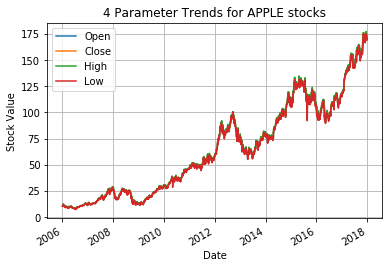

In [8]:
stock_tickers['AAPL'][['Date','Open','Close','High','Low']].set_index('Date').plot()
plt.ylabel('Stock Value')
#plt.xlabel('Year')
plt.title("4 Parameter Trends for APPLE stocks")
plt.grid(True)
plt.show()

Putting all the four parameters together as shown above, we see that the parameters follow a similar pattern as shown above.

Text(0.5,1,'Distribution of Closing Price for APPLE stocks')

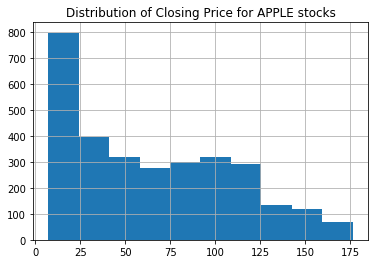

In [50]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
stock_tickers['AAPL']['Close'].hist()
#plt.ylabel('Volatility Value/Index')
#plt.xlabel('Year')
plt.title("Distribution of Closing Price for APPLE stocks")

C:\Users\oduwo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


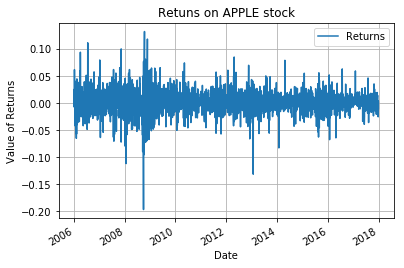

In [9]:
stock_tickers['AAPL']['Returns'] = np.log( stock_tickers['AAPL'].Close /  stock_tickers['AAPL'].Close.shift())
stock_tickers['AAPL'][['Date','Returns']].set_index('Date').plot()
plt.ylabel('Value of Returns')
#plt.xlabel('Year')
plt.title("Retuns on APPLE stock")
plt.grid(True)
plt.show()

We can see a sharp dip in the value of the returns for the APPLE stock between the 2008 and 2010.This corresponds accurately with the season of financial crisis in 2008 

C:\Users\oduwo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


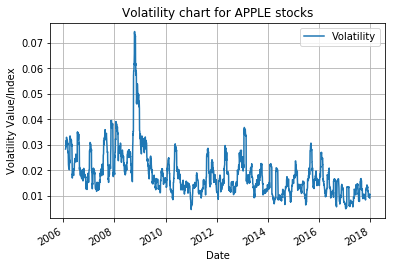

In [11]:
stock_tickers['AAPL']['Volatility'] = stock_tickers['AAPL']['Returns'].rolling(21).std().shift()
stock_tickers['AAPL'][['Date','Volatility']].set_index('Date').plot()
plt.ylabel('Volatility Value/Index')
#plt.xlabel('Year')
plt.title("Volatility chart for APPLE stocks")
plt.grid(True)
plt.show()

Appropriately, the volatility chart above, corresponds with the previous returns chart earlier described.The highest volatility period as shown above is between the years 2008 and 2010 which coincides with the season of the financial meltdown. 

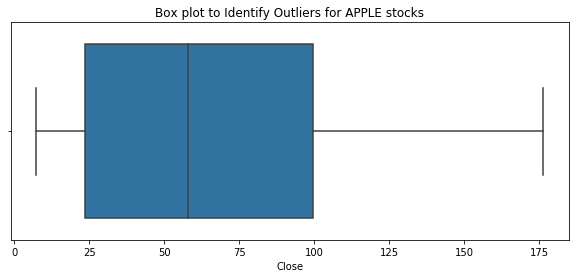

In [20]:
plt.rcParams['figure.figsize'] = 10, 4; 
plt.title("Box plot to Identify Outliers for APPLE stocks")
_=sns.boxplot(x='Close', data=stock_tickers['AAPL'])

The box plot above shows an almost normal distribution with no outliers

Text(0.5,1,'Distribution of Returns for APPLE stocks')

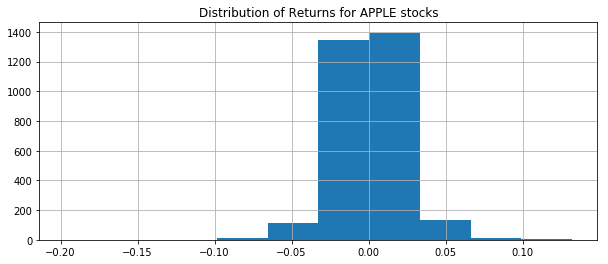

In [19]:
stock_tickers['AAPL']['Returns'].hist()
#plt.ylabel('Volatility Value/Index')
#plt.xlabel('Year')
plt.title("Distribution of Returns for APPLE stocks")

We can see that the returns for the Apple stock above seem to follow a normal distribution and agrees with the box plot above

In [22]:
AABA = mydf[mydf['Name']=='AABA']
AAPL = mydf[mydf['Name']=='AAPL']
AMZN = mydf[mydf['Name']=='AMZN']
AXP = mydf[mydf['Name']=='AXP']
BA = mydf[mydf['Name']=='BA']
CAT = mydf[mydf['Name']=='CAT']
CSCO = mydf[mydf['Name']=='CSCO']
CVX = mydf[mydf['Name']=='CVX']
DIS = mydf[mydf['Name']=='DIS']
GE = mydf[mydf['Name']=='GE']
GOOGL = mydf[mydf['Name']=='GOOGL']
GS = mydf[mydf['Name']=='GS']
HD = mydf[mydf['Name']=='HD']
IBM = mydf[mydf['Name']=='IBM']
INTC = mydf[mydf['Name']=='INTC']
JNJ = mydf[mydf['Name']=='JNJ']
JPM = mydf[mydf['Name']=='JPM']
KO = mydf[mydf['Name']=='KO']
MCD = mydf[mydf['Name']=='MCD']
MMM = mydf[mydf['Name']=='MMM']
MSK = mydf[mydf['Name']=='MRK']
MSFT = mydf[mydf['Name']=='MSFT']
NKE = mydf[mydf['Name']=='NKE']
PFE = mydf[mydf['Name']=='PFE']
PG = mydf[mydf['Name']=='PG']
TRV = mydf[mydf['Name']=='TRV']
UNH = mydf[mydf['Name']=='UNH']
UTX = mydf[mydf['Name']=='UTX']
VZ = mydf[mydf['Name']=='VZ']
WMT = mydf[mydf['Name']=='WMT']
XOM = mydf[mydf['Name']=='XOM']

In [49]:
stock_close_max=mydf.groupby(['Name'],as_index=False)['Close'].max().rename(columns={'Close':'MaxClose'}).sort_values(by='MaxClose',ascending=False)
stock_close_max

,Name,MaxClose
2,AMZN,1195.83
10,GOOGL,1085.09
4,BA,297.90
11,GS,261.01
19,MMM,243.14
26,UNH,228.17
13,IBM,215.80
12,HD,190.36
1,AAPL,176.42
18,MCD,174.20


The above table shows the maximum performance of each stock price

# Question 3 :  You need to take one stock and perform descriptive analysis                (Min, Max, explore some moving averages over the time) and Compare two           stock’s descriptive analysis.

The following tables show the descriptive statiscal details for 2 companies: XOM , AAPL, GOOGL, PG, MCD

In [28]:
stock_tickers['GOOGL']['Returns'] = np.log( stock_tickers['GOOGL'].Close /  stock_tickers['GOOGL'].Close.shift())
stock_tickers['GOOGL']['Volatility'] = stock_tickers['GOOGL']['Returns'].rolling(21).std().shift()
stock_tickers['GOOGL'].describe()

C:\Users\oduwo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\oduwo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Open,High,Low,Close,Volume,Returns,Volatility
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03,3018.000000,2997.000000
mean,428.200802,431.835618,424.130275,428.044001,3.551504e+06,0.000522,0.016230
std,236.320026,237.514087,234.923747,236.343238,3.038599e+06,0.018331,0.008498
min,131.390000,134.820000,123.770000,128.850000,5.211410e+05,-0.123425,0.004055
25%,247.775000,250.190000,244.035000,247.605000,1.760854e+06,-0.007575,0.010439
50%,310.480000,312.810000,307.790000,310.080000,2.517630e+06,0.000363,0.013965
75%,572.140000,575.975000,565.900000,570.770000,4.242182e+06,0.008993,0.018601
max,1083.020000,1086.490000,1072.270000,1085.090000,4.118289e+07,0.182255,0.055989


In [29]:
stock_tickers['AAPL'].describe()

,Open,High,Low,Close,Volume,Returns,Volatility
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03,3018.000000,2997.000000
mean,64.673309,65.256833,64.033445,64.662892,1.311457e+08,0.000915,0.018356
std,44.524927,44.811772,44.230829,44.536448,1.018560e+08,0.020441,0.008929
min,7.390000,7.560000,7.170000,7.240000,1.147592e+07,-0.197280,0.004560
25%,23.425000,23.805000,23.015000,23.420000,5.292889e+07,-0.008490,0.012751
50%,57.860000,58.460000,57.320000,57.920000,1.066271e+08,0.000755,0.016045
75%,99.165000,100.275000,98.385000,99.480000,1.798977e+08,0.011393,0.021782
max,175.110000,177.200000,174.860000,176.420000,8.432640e+08,0.132172,0.074427


Populating the interactive namespace from numpy and matplotlib


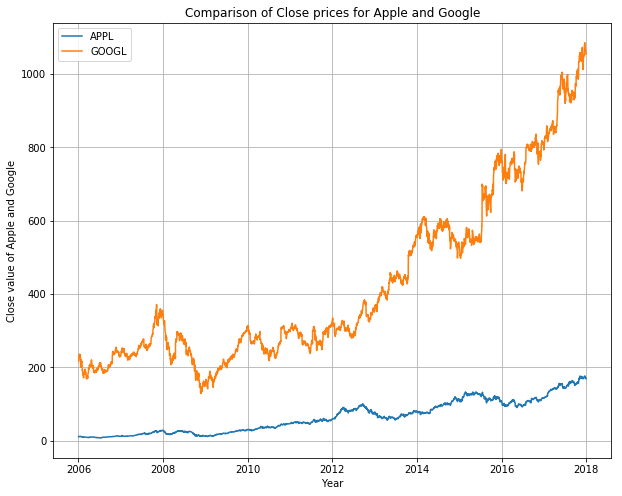

In [30]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)
plt.plot(stock_tickers['AAPL']['Date'], stock_tickers['AAPL']['Close'])
plt.plot(stock_tickers['GOOGL']['Date'], stock_tickers['GOOGL']['Close'])
plt.ylabel('Close value of Apple and Google')
plt.xlabel('Year')
plt.title("Comparison of Close prices for Apple and Google")
plt.legend(['APPL','GOOGL'], loc='upper left')
plt.grid(True)
plt.show()

Comparing the stock closing prices of Apple and Google, we can see a steady increase in the Apple prices, however even though the prices of Google has been incresing, we can see that it displays a higher fluctuation.

Populating the interactive namespace from numpy and matplotlib


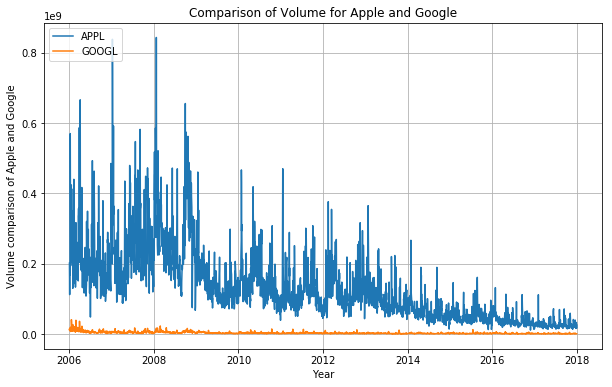

In [31]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
plt.plot(stock_tickers['AAPL']['Date'], stock_tickers['AAPL']['Volume'])
plt.plot(stock_tickers['GOOGL']['Date'], stock_tickers['GOOGL']['Volume'])
plt.ylabel('Volume comparison of Apple and Google')
plt.xlabel('Year')
plt.title("Comparison of Volume for Apple and Google")
plt.legend(['APPL','GOOGL'], loc='upper left')
plt.grid(True)
plt.show()

Populating the interactive namespace from numpy and matplotlib


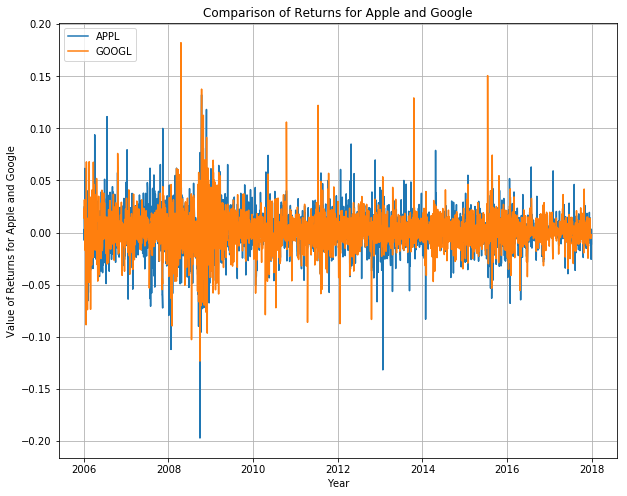

In [48]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)
plt.plot(stock_tickers['AAPL']['Date'], stock_tickers['AAPL']['Returns'])
plt.plot(stock_tickers['GOOGL']['Date'], stock_tickers['GOOGL']['Returns'])
plt.ylabel('Value of Returns for Apple and Google')
plt.xlabel('Year')
plt.title("Comparison of Returns for Apple and Google")
plt.legend(['APPL','GOOGL'], loc='upper left')
plt.grid(True)
plt.show()

The above chart shows that Google seemed to have experienced a higher returns and also higher spikes 

Populating the interactive namespace from numpy and matplotlib


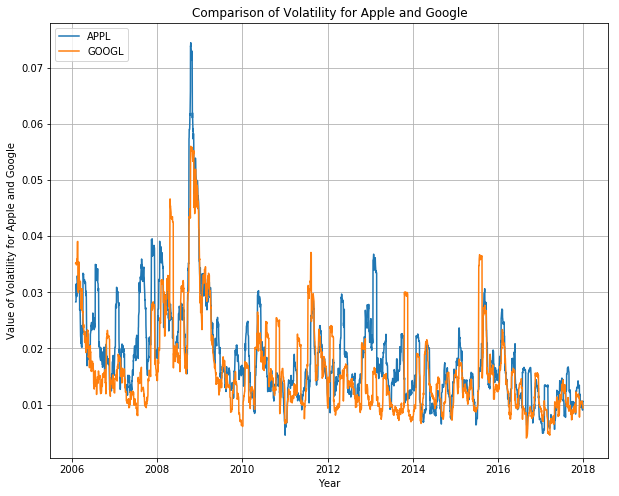

In [47]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)
plt.plot(stock_tickers['AAPL']['Date'], stock_tickers['AAPL']['Volatility'])
plt.plot(stock_tickers['GOOGL']['Date'], stock_tickers['GOOGL']['Volatility'])
plt.ylabel('Value of Volatility for Apple and Google')
plt.xlabel('Year')
plt.title("Comparison of Volatility for Apple and Google")
plt.legend(['APPL','GOOGL'], loc='upper left')
plt.grid(True)
plt.show()

The above shows that Apple displayed a greater amount of volatility compared to Google over the 12 years that was considered.

# Question 4: Take five stocks of your choice and create the same type of report stated in question 3.

In [40]:
stock_tickers['XOM']['Returns'] = np.log( stock_tickers['XOM'].Close /  stock_tickers['XOM'].Close.shift())
stock_tickers['XOM']['Volatility'] = stock_tickers['XOM']['Returns'].rolling(21).std().shift()
stock_tickers['PG']['Returns'] = np.log( stock_tickers['PG'].Close /  stock_tickers['PG'].Close.shift())
stock_tickers['PG']['Volatility'] = stock_tickers['PG']['Returns'].rolling(21).std().shift()
stock_tickers['MCD']['Returns'] = np.log( stock_tickers['MCD'].Close /  stock_tickers['MCD'].Close.shift())
stock_tickers['MCD']['Volatility'] = stock_tickers['MCD']['Returns'].rolling(21).std().shift()

C:\Users\oduwo\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\oduwo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\oduwo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.

The following tables show the descriptive statiscal details for 5 companies: XOM , AAPL, GOOGL, PG, MCD

In [34]:
stock_tickers['AAPL'].describe()

,Open,High,Low,Close,Volume,Returns,Volatility
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03,3018.000000,2997.000000
mean,64.673309,65.256833,64.033445,64.662892,1.311457e+08,0.000915,0.018356
std,44.524927,44.811772,44.230829,44.536448,1.018560e+08,0.020441,0.008929
min,7.390000,7.560000,7.170000,7.240000,1.147592e+07,-0.197280,0.004560
25%,23.425000,23.805000,23.015000,23.420000,5.292889e+07,-0.008490,0.012751
50%,57.860000,58.460000,57.320000,57.920000,1.066271e+08,0.000755,0.016045
75%,99.165000,100.275000,98.385000,99.480000,1.798977e+08,0.011393,0.021782
max,175.110000,177.200000,174.860000,176.420000,8.432640e+08,0.132172,0.074427


In [35]:
stock_tickers['GOOGL'].describe()

,Open,High,Low,Close,Volume,Returns,Volatility
count,3019.000000,3019.000000,3019.000000,3019.000000,3.019000e+03,3018.000000,2997.000000
mean,428.200802,431.835618,424.130275,428.044001,3.551504e+06,0.000522,0.016230
std,236.320026,237.514087,234.923747,236.343238,3.038599e+06,0.018331,0.008498
min,131.390000,134.820000,123.770000,128.850000,5.211410e+05,-0.123425,0.004055
25%,247.775000,250.190000,244.035000,247.605000,1.760854e+06,-0.007575,0.010439
50%,310.480000,312.810000,307.790000,310.080000,2.517630e+06,0.000363,0.013965
75%,572.140000,575.975000,565.900000,570.770000,4.242182e+06,0.008993,0.018601
max,1083.020000,1086.490000,1072.270000,1085.090000,4.118289e+07,0.182255,0.055989


In [51]:
stock_tickers['XOM'].describe()

,Open,High,Low,Close,Volume,Returns,Volatility
count,3019.000000,3020.000000,3019.000000,3020.000000,3.020000e+03,3019.000000,2998.000000
mean,80.968665,81.664589,80.283239,81.012185,1.942885e+07,0.000119,0.012882
std,10.402705,10.369552,10.423477,10.397202,1.086254e+07,0.015109,0.008276
min,56.420000,56.990000,55.940000,56.570000,4.603210e+05,-0.150271,0.002647
25%,73.180000,74.082500,72.365000,73.230000,1.169322e+07,-0.006802,0.008428
50%,82.600000,83.220000,82.000000,82.605000,1.737146e+07,0.000169,0.011171
75%,88.295000,88.855000,87.650000,88.352500,2.381071e+07,0.007263,0.014623
max,104.420000,104.760000,103.950000,104.380000,1.180235e+08,0.158631,0.082752


In [52]:
stock_tickers['MCD'].describe()

,Open,High,Low,Close,Volume,Returns,Volatility
count,3019.000000,3019.000000,3020.000000,3020.000000,3.020000e+03,3019.000000,2998.000000
mean,84.400437,84.994515,83.856964,84.450921,6.649816e+06,0.000542,0.010658
std,31.000837,31.098925,30.947941,31.040137,3.887800e+06,0.011681,0.005057
min,32.000000,32.590000,31.730000,31.940000,6.486180e+05,-0.083157,0.002326
25%,58.035000,58.675000,57.330000,58.065000,4.332264e+06,-0.005424,0.007446
50%,88.950000,89.510000,88.125000,88.720000,5.765221e+06,0.000825,0.009542
75%,99.110000,99.660000,98.532500,99.235000,7.874860e+06,0.006500,0.012483
max,174.870000,175.780000,174.110000,174.200000,8.698180e+07,0.089745,0.045027


In [46]:
stock_tickers['PG'].describe()

,Open,High,Low,Close,Volume,Returns,Volatility
count,3019.000000,3020.000000,3019.000000,3020.000000,3.020000e+03,3019.000000,2998.000000
mean,70.937138,71.422474,70.466996,70.970583,1.059313e+07,0.000148,0.009633
std,11.221489,11.211023,11.251790,11.223018,6.345311e+06,0.010756,0.004989
min,44.510000,45.190000,39.370000,44.180000,6.656760e+05,-0.082264,0.002940
25%,62.480000,62.987500,62.080000,62.560000,7.156298e+06,-0.004499,0.006609
50%,67.140000,67.645000,66.830000,67.210000,9.181098e+06,0.000154,0.008642
75%,80.860000,81.352500,80.360000,80.942500,1.200428e+07,0.005154,0.011167
max,94.170000,94.670000,93.830000,94.400000,1.237357e+08,0.097257,0.044512


The following visualizations show the comparison of each of the 5 companies to compare stock performance 

Out of the 5 companies being compared, Google shows the highest closing price over the years, Apple and P&G show a decent increase from 2006 to 2018.But the closing price of EXXON(XOM) has hovered around the same region over the 12 years under consideration

Populating the interactive namespace from numpy and matplotlib


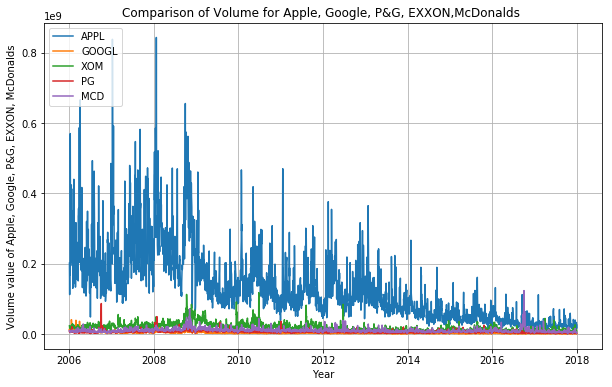

In [44]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
plt.plot(stock_tickers['AAPL']['Date'], stock_tickers['AAPL']['Volume'])
plt.plot(stock_tickers['GOOGL']['Date'], stock_tickers['GOOGL']['Volume'])
plt.plot(stock_tickers['XOM']['Date'], stock_tickers['XOM']['Volume'])
plt.plot(stock_tickers['MCD']['Date'], stock_tickers['MCD']['Volume'])
plt.plot(stock_tickers['PG']['Date'], stock_tickers['PG']['Volume'])
plt.ylabel('Volume value of Apple, Google, P&G, EXXON, McDonalds')
plt.xlabel('Year')
plt.title("Comparison of Volume for Apple, Google, P&G, EXXON,McDonalds ")
plt.legend(['APPL','GOOGL','XOM','PG','MCD'], loc='upper left')
plt.grid(True)
plt.show()

The chart above clearly shows that Apple's stocks were traded the most in terms of volumes

Populating the interactive namespace from numpy and matplotlib


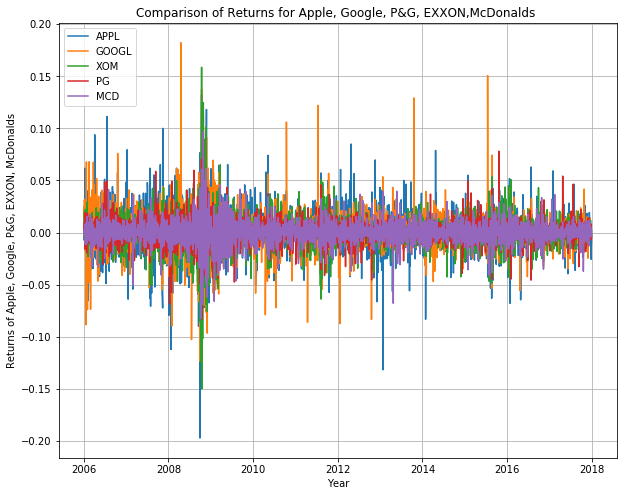

In [43]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)
plt.plot(stock_tickers['AAPL']['Date'], stock_tickers['AAPL']['Returns'])
plt.plot(stock_tickers['GOOGL']['Date'], stock_tickers['GOOGL']['Returns'])
plt.plot(stock_tickers['XOM']['Date'], stock_tickers['XOM']['Returns'])
plt.plot(stock_tickers['MCD']['Date'], stock_tickers['MCD']['Returns'])
plt.plot(stock_tickers['PG']['Date'], stock_tickers['PG']['Returns'])
plt.ylabel('Returns of Apple, Google, P&G, EXXON, McDonalds')
plt.xlabel('Year')
plt.title("Comparison of Returns for Apple, Google, P&G, EXXON,McDonalds ")
plt.legend(['APPL','GOOGL','XOM','PG','MCD'], loc='upper left')
plt.grid(True)
plt.show()

The above chart shows that Google displayed the highest levels of returns, McDonald's(MCD) shows a steady trend in its returns while EXXON(XOM) seems to have the least out of  the 5 in terms of returns

Populating the interactive namespace from numpy and matplotlib


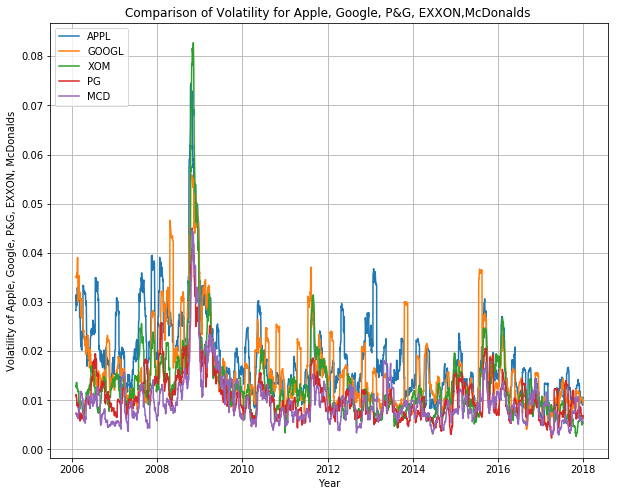

In [42]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)
plt.plot(stock_tickers['AAPL']['Date'], stock_tickers['AAPL']['Volatility'])
plt.plot(stock_tickers['GOOGL']['Date'], stock_tickers['GOOGL']['Volatility'])
plt.plot(stock_tickers['XOM']['Date'], stock_tickers['XOM']['Volatility'])
plt.plot(stock_tickers['MCD']['Date'], stock_tickers['MCD']['Volatility'])
plt.plot(stock_tickers['PG']['Date'], stock_tickers['PG']['Volatility'])
plt.ylabel('Volatility of Apple, Google, P&G, EXXON, McDonalds')
plt.xlabel('Year')
plt.title("Comparison of Volatility for Apple, Google, P&G, EXXON,McDonalds ")
plt.legend(['APPL','GOOGL','XOM','PG','MCD'], loc='upper left')
plt.grid(True)
plt.show()

In the above chart comparing 5 stock prices, it is reasonable that EXXON(XOM) has the highest volatility because of the cyclical nature of the oil and gas industry.We can also see that Procter&Gamble (PG) displays the lowest level of volatility because of the nature of the industry.PG is in the fast moving consumer goods industry supplying daily needs of everyone.